<a href="https://colab.research.google.com/github/pradyumnakr/EIP/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Basic Architectures for ResNet

---
## The Following Code Follows ResNet-50 Architecture
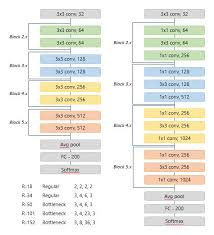
---

Architectural Parameters:
![3](https://cdn-images-1.medium.com/max/1600/1*hEU7S-EiVqcmtAlj6kgfRA.png)

---

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls

gdrive	sample_data


In [0]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!ls
!unzip -qq 'tiny-imagenet-200.zip'
!ls

--2019-04-07 09:28:36--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  20.7MB/s    in 14s     

2019-04-07 09:28:51 (16.7 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]

gdrive	sample_data  tiny-imagenet-200.zip
gdrive	sample_data  tiny-imagenet-200	tiny-imagenet-200.zip


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib  inline
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
val_data = pd.read_csv('./tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])
val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)
val_data.head(3)

,File,Class
0,val_0.JPEG,n03444034
1,val_1.JPEG,n04067472
2,val_2.JPEG,n04070727


In [0]:
# Use Augmentaion parameters as required.
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=60,
    horizontal_flip=True,
    fill_mode="nearest"
    )

valid_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(64, 64), color_mode='rgb', 
                                                    batch_size=500, class_mode='categorical', shuffle=True, seed=42)
val_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(64, 64),
                                                    color_mode='rgb', class_mode='categorical', batch_size=500, shuffle=True, seed=42)



Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.


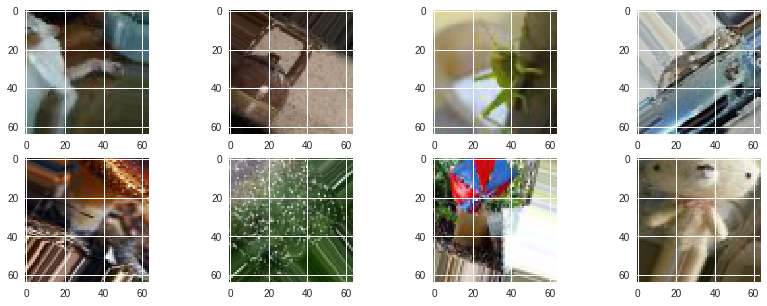

In [0]:
x_batch, y_batch = next(train_generator)
x_batch.shape

fig = plt.figure(figsize=(14, 5))

for i in range(8):
    sub = fig.add_subplot(2, 4, i + 1)
    sub.imshow(x_batch[i,:,:], interpolation='nearest')

In [0]:
from keras.layers import Input, Dense
from keras.layers import add
from keras.models import Model
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization, Activation, SeparableConv2D, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, DepthwiseConv2D

inputs = Input(shape=(64,64,3,))
x1 = Conv2D(64, (1, 1),activation='relu')(inputs)
x1 = Conv2D(64, (3,3), strides=(2,2), padding='same')(x1)
x1 = Conv2D(64, (3,3), strides=(1,1), padding='same')(x1)
x1 = Conv2D(64, (3,3), strides=(1,1), padding='same')(x1)
x1 = Conv2D(64, (3,3), strides=(1,1), padding='same')(x1)
x1 = MaxPooling2D(pool_size=2, strides=(2,2))(x1)

shortcut = x1
a = SeparableConv2D(64,(3,3),padding='same')(x1)
a = BatchNormalization(axis=-1, epsilon=2e-5, momentum=0.9)(a)
a = LeakyReLU(alpha=0.1)(a)
a = Conv2D(64,(3,3),padding='same',activation='relu')(a)
a = Conv2D(64,(3,3),padding='same',activation='relu')(a)
a = Conv2D(64,(3,3),padding='same',activation='relu')(a)
a = Conv2D(64,(3,3),padding='same',activation='relu')(a)
a = Conv2D(64,(3,3),padding='same',activation='relu')(a)
a = add([a, shortcut])
a = MaxPooling2D(pool_size=2, strides=(2,2))(a)

shortcut = Conv2D(128, (1, 1), padding='same')(a)
b = SeparableConv2D(128,(3,3),padding='same')(a)
b = BatchNormalization(axis=-1, epsilon=2e-5, momentum=0.9)(b)
b = LeakyReLU(alpha=0.1)(b)
b = Conv2D(128,(3,3),padding='same',activation='relu')(b)
b = Conv2D(128,(3,3),padding='same',activation='relu')(b)
b = Conv2D(128,(3,3),padding='same',activation='relu')(b)
b = Conv2D(128,(3,3),padding='same',activation='relu')(b)
b = Conv2D(128,(3,3),padding='same',activation='relu')(b)
b = Conv2D(128,(3,3),padding='same',activation='relu')(b)
b = Conv2D(128,(3,3),padding='same',activation='relu')(b)
b = add([b, shortcut])
b = MaxPooling2D(pool_size=2, strides=(2,2))(b)

shortcut = Conv2D(256, (1, 1), padding='same')(b)
c = SeparableConv2D(256,(3,3),padding='same')(b)
c = BatchNormalization(axis=-1, epsilon=2e-5, momentum=0.9)(c)
c = LeakyReLU(alpha=0.1)(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = Conv2D(256,(3,3),padding='same',activation='relu')(c)
c = add([c, shortcut])
c = MaxPooling2D(pool_size=2, strides=(2,2))(c)

shortcut = Conv2D(512, (1, 1), padding='same')(c)
d = SeparableConv2D(512,(3,3),padding='same')(c)
d = BatchNormalization(axis=-1, epsilon=2e-5, momentum=0.9)(d)
d = LeakyReLU(alpha=0.1)(d)
d = Conv2D(512,(3,3),padding='same',activation='relu')(d)
d = Conv2D(512,(3,3),padding='same',activation='relu')(d)
d = Conv2D(512,(3,3),padding='same',activation='relu')(d)
d = Conv2D(512,(3,3),padding='same',activation='relu')(d)
d = Conv2D(512,(3,3),padding='same',activation='relu')(d)
d = add([d, shortcut])
d = MaxPooling2D(pool_size=2, strides=(2,2))(d)

d = Conv2D(200, (1,1))(d)
d = Flatten()(d)
d = BatchNormalization(axis=-1, epsilon=2e-5, momentum=0.9)(d)
output = Activation('softmax')(d)
model = Model(inputs=inputs, outputs=output)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   256         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 64)   36928       conv2d_2[0][0]                   
_____________________________________

In [0]:
!pip install h5py pyyaml 
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras

checkpoint_path = "/content/gdrive/My Drive/training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,  monitor='val_loss',
                                                 save_weights_only=False,
                                                 verbose=1,period=5)

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)


In [0]:
from keras.optimizers import Adam
import math
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, Callback

opt = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
model.fit_generator(train_generator,steps_per_epoch=100000 // 512, validation_data=val_generator, validation_steps=10000 // 512, epochs=50, max_queue_size=64*2,verbose=1, callbacks = [cp_callback])
model.save_weights('first_try.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
195/195 [==============================] - 274s 1s/step - loss: 5.3135 - acc: 0.0084 - val_loss: 6.7448 - val_acc: 0.0056
Epoch 2/50
195/195 [==============================] - 239s 1s/step - loss: 5.1121 - acc: 0.0181 - val_loss: 5.4397 - val_acc: 0.0131
Epoch 3/50
195/195 [==============================] - 241s 1s/step - loss: 4.9017 - acc: 0.0348 - val_loss: 4.9853 - val_acc: 0.0300
Epoch 4/50
195/195 [==============================] - 238s 1s/step - loss: 4.7705 - acc: 0.0473 - val_loss: 4.7390 - val_acc: 0.0517
Epoch 5/50
195/195 [==============================] - 239s 1s/step - loss: 4.6617 - acc: 0.0620 - val_loss: 4.7606 - val_acc: 0.0502

Epoch 00005: saving model to /content/gdrive/My Drive/training/cp.ckpt
Epoch 6/50
195/195 [==============================] - 238s 1s/step - loss: 4.5631 - acc: 0.0736 - val_loss: 4.6383 - val_acc: 0.0627
Epoch 7/50
195/195 [==============================] - 238s 1s/step - loss: 4.4417 

In [0]:
#50 epoches done
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
model = load_model("/content/gdrive/My Drive/training_1/cp.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/training_1/cp.ckpt", 
                                                 save_weights_only=False,
                                                 verbose=1,period=5)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'./tiny-imagenet-200/train/',
        target_size=(64, 64),
        batch_size=256,
        class_mode='categorical')

val_generator = valid_datagen.flow_from_dataframe(
        val_data, directory='./tiny-imagenet-200/val/images/',
        x_col='File', y_col='Class',
        target_size=(64, 64),
        batch_size=256,
        class_mode='categorical')

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.


In [0]:
model.fit_generator(train_generator,steps_per_epoch=100000 // 256, validation_data=val_generator, validation_steps=10000 // 256, epochs=50, max_queue_size=64*2,verbose=1, callbacks = [cp_callback])

Epoch 1/50
391/391 [==============================] - 258s 661ms/step - loss: 2.7619 - acc: 0.3583 - val_loss: 3.0657 - val_acc: 0.3171
Epoch 2/50
391/391 [==============================] - 268s 686ms/step - loss: 2.3565 - acc: 0.4351 - val_loss: 2.7014 - val_acc: 0.3753
Epoch 3/50
391/391 [==============================] - 266s 681ms/step - loss: 2.1884 - acc: 0.4658 - val_loss: 2.6342 - val_acc: 0.3869
Epoch 4/50
391/391 [==============================] - 265s 678ms/step - loss: 2.0597 - acc: 0.4942 - val_loss: 2.8237 - val_acc: 0.3629
Epoch 5/50
40/40 [==============================] - 12s 291ms/step - loss: 2.7035 - acc: 0.3845

Epoch 00005: saving model to /content/gdrive/My Drive/training_1/cp.ckpt
391/391 [==============================] - 336s 860ms/step - loss: 1.9520 - acc: 0.5147 - val_loss: 2.7035 - val_acc: 0.3845
Epoch 6/50
391/391 [==============================] - 226s 578ms/step - loss: 1.8552 - acc: 0.5362 - val_loss: 2.7133 - val_acc: 0.3906
Epoch 7/50
391/391 [=====

KeyboardInterrupt: ignored

In [0]:
#60 epoches done
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
model = load_model("/content/gdrive/My Drive/training_1/cp.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/training_1/cp.ckpt", 
                                                 save_weights_only=False,
                                                 verbose=1,period=5)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'./tiny-imagenet-200/train/',
        target_size=(64, 64),
        batch_size=128,
        class_mode='categorical')

val_generator = valid_datagen.flow_from_dataframe(
        val_data, directory='./tiny-imagenet-200/val/images/',
        x_col='File', y_col='Class',
        target_size=(64, 64),
        batch_size=128,
        class_mode='categorical')

model.fit_generator(train_generator,steps_per_epoch=100000 // 128, validation_data=val_generator, validation_steps=10000 // 128, epochs=50, max_queue_size=64*2,verbose=1, callbacks = [cp_callback])

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/50
782/782 [==============================] - 341s 436ms/step - loss: 2.6355 - acc: 0.3813 - val_loss: 2.7131 - val_acc: 0.3799
Epoch 2/50
782/782 [==============================] - 352s 450ms/step - loss: 2.3019 - acc: 0.4457 - val_loss: 2.6535 - val_acc: 0.3872
Epoch 3/50
782/782 [==============================] - 353s 452ms/step - loss: 2.2116 - acc: 0.4642 - val_loss: 2.6990 - val_acc: 0.3872
Epoch 4/50
782/782 [==============================] - 355s 454ms/step - loss: 2.1665 - acc: 0.4723 - val_loss: 2.6374 - val_acc: 0.3998
Epoch 5/50
79/79 [==============================] - 15s 187ms/step - loss: 2.6528 - acc: 0.3947

Epoch 00005: saving model to /content/gdrive/My Drive/training_1/cp.ckpt
782/782 [==============================] - 425s 543ms/step - loss: 2.1202 - acc: 0.4806 - val_loss: 2.6528 - val_acc: 0.3947
Epoch 6/50
782/782 [==============================] - 323s 413ms/step 

KeyboardInterrupt: ignored

In [0]:
#75 epoches done
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
model = load_model("/content/gdrive/My Drive/training_1/cp.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/training_1/cp.ckpt", 
                                                 save_weights_only=False,
                                                 verbose=1,period=5)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'./tiny-imagenet-200/train/',
        target_size=(64, 64),
        batch_size=128,
        class_mode='categorical')

val_generator = valid_datagen.flow_from_dataframe(
        val_data, directory='./tiny-imagenet-200/val/images/',
        x_col='File', y_col='Class',
        target_size=(64, 64),
        batch_size=128,
        class_mode='categorical')

model.fit_generator(train_generator,steps_per_epoch=100000 // 128, validation_data=val_generator, validation_steps=10000 // 128, epochs=50, max_queue_size=64*2,verbose=1, callbacks = [cp_callback])

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/50
782/782 [==============================] - 372s 476ms/step - loss: 1.9604 - acc: 0.5082 - val_loss: 2.6341 - val_acc: 0.4151
Epoch 2/50
782/782 [==============================] - 377s 482ms/step - loss: 1.6676 - acc: 0.5708 - val_loss: 2.6476 - val_acc: 0.4227
Epoch 3/50
782/782 [==============================] - 377s 482ms/step - loss: 1.5991 - acc: 0.5868 - val_loss: 2.6560 - val_acc: 0.4224
Epoch 4/50
782/782 [==============================] - 372s 476ms/step - loss: 1.5601 - acc: 0.5940 - val_loss: 2.6965 - val_acc: 0.4245
Epoch 5/50
79/79 [==============================] - 16s 201ms/step - loss: 2.6709 - acc: 0.4232

Epoch 00005: saving model to /content/gdrive/My Drive/training_1/cp.ckpt
782/782 [==============================] - 423s 541ms/step - loss: 1.5329 - acc: 0.6007 - val_loss: 2.6709 - val_acc: 0.4232
Epoch 6/50
782/782 [==============================] - 322s 412ms/step 

KeyboardInterrupt: ignored

In [0]:
#80 epoches done
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
model = load_model("/content/gdrive/My Drive/training_1/cp.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/training_1/cp.ckpt", 
                                                 save_weights_only=False,
                                                 verbose=1,period=5)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=60,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'./tiny-imagenet-200/train/',
        target_size=(64, 64),
        batch_size=256,
        class_mode='categorical')

val_generator = valid_datagen.flow_from_dataframe(
        val_data, directory='./tiny-imagenet-200/val/images/',
        x_col='File', y_col='Class',
        target_size=(64, 64),
        batch_size=256,
        class_mode='categorical')

model.fit_generator(train_generator,steps_per_epoch=100000 // 256, validation_data=val_generator, validation_steps=10000 // 256, epochs=50, max_queue_size=64*2,verbose=1, callbacks = [cp_callback])

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/50
391/391 [==============================] - 306s 784ms/step - loss: 2.4110 - acc: 0.4231 - val_loss: 2.9022 - val_acc: 0.3587
Epoch 2/50
391/391 [==============================] - 270s 691ms/step - loss: 2.1962 - acc: 0.4649 - val_loss: 2.7169 - val_acc: 0.3897
Epoch 3/50
391/391 [==============================] - 271s 693ms/step - loss: 2.1275 - acc: 0.4776 - val_loss: 2.6861 - val_acc: 0.3978
Epoch 4/50
391/391 [==============================] - 270s 689ms/step - loss: 2.1013 - acc: 0.4841 - val_loss: 2.6866 - val_acc: 0.3987
Epoch 5/50
40/40 [==============================] - 11s 281ms/step - loss: 2.6667 - acc: 0.4059

Epoch 00005: saving model to /content/gdrive/My Drive/training_1/cp.ckpt
391/391 [==============================] - 292s 746ms/step - loss: 2.0708 - acc: 0.4891 - val_loss: 2.6667 - val_acc: 0.4059
Epoch 6/50
391/391 [==============================] - 257s 657ms/step 

KeyboardInterrupt: ignored

In [0]:
#85 epoches done
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
model = load_model("/content/gdrive/My Drive/training_1/cp.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/training_1/cp.ckpt", 
                                                 save_weights_only=False,
                                                 verbose=1,period=5)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.1,
        rotation_range=60,
        zca_whitening=True,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'./tiny-imagenet-200/train/',
        target_size=(64, 64),
        batch_size=256,
        shuffle=True,
        class_mode='categorical')

val_generator = valid_datagen.flow_from_dataframe(
        val_data, directory='./tiny-imagenet-200/val/images/',
        x_col='File', y_col='Class',
        target_size=(64, 64),
        batch_size=256,
        shuffle=True,
        class_mode='categorical')

model.fit_generator(train_generator,steps_per_epoch=100000 // 256, validation_data=val_generator, validation_steps=10000 // 256, epochs=50, max_queue_size=64*2,verbose=1, callbacks = [cp_callback])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:718: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
391/391 [==============================] - 266s 680ms/step - loss: 2.2982 - acc: 0.4462 - val_loss: 2.7883 - val_acc: 0.3839
Epoch 2/50
391/391 [==============================] - 266s 681ms/step - loss: 2.0923 - acc: 0.4862 - val_loss: 2.8856 - val_acc: 0.3763
Epoch 3/50
391/391 [==============================] - 268s 685ms/step - loss: 2.0348 - acc: 0.4957 - val_loss: 2.8569 - val_acc: 0.3808
Epoch 4/50
391/391 [==============================] - 269s 688ms/step - loss: 1.9940 - acc: 0.5055 - val_loss: 2.8740 - val_acc: 0.3854
Epoch 5/50
40/40 [==============================] - 12s 298ms/step - loss: 2.6980 - acc: 0.4032

Epoch 00005: saving model to /content/gdrive/My Drive/training_1/cp.ckpt
391/391 [==============================] - 319s 815ms/step - loss: 1.9755 - acc: 0.5095 - val_loss: 2.6980 - val_acc: 0.4032
Epoch 6/50
391/391 [==============================] - 234s 599ms/step - loss: 1.9550 - acc: 0.5149 - val_loss: 2.7257 - val_acc: 0.3976
Epoch 7/50
391/391 [=====

KeyboardInterrupt: ignored

In [0]:
#95 epoches done
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
model = load_model("/content/gdrive/My Drive/training_1/cp.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/training_1/cp.ckpt", 
                                                 save_weights_only=False,
                                                 verbose=1,period=5)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'./tiny-imagenet-200/train/',
        target_size=(64, 64),
        batch_size=128,
        class_mode='categorical')

val_generator = valid_datagen.flow_from_dataframe(
        val_data, directory='./tiny-imagenet-200/val/images/',
        x_col='File', y_col='Class',
        target_size=(64, 64),
        batch_size=128,
        class_mode='categorical')

model.fit_generator(train_generator,steps_per_epoch=100000 // 512, validation_data=val_generator, validation_steps=10000 // 512, epochs=50, max_queue_size=64*2,verbose=1, callbacks = [cp_callback])

Instructions for updating:
Use tf.cast instead.
Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Epoch 1/50
782/782 [==============================] - 414s 529ms/step - loss: 1.9446 - acc: 0.5093 - val_loss: 2.6184 - val_acc: 0.4133
Epoch 2/50
782/782 [==============================] - 335s 428ms/step - loss: 1.6573 - acc: 0.5725 - val_loss: 2.6766 - val_acc: 0.4123
Epoch 3/50
782/782 [==============================] - 350s 448ms/step - loss: 1.5768 - acc: 0.5922 - val_loss: 2.6119 - val_acc: 0.4252
Epoch 4/50
782/782 [==============================] - 346s 442ms/step - loss: 1.5406 - acc: 0.5998 - val_loss: 2.6518 - val_acc: 0.4178
Epoch 5/50
79/79 [==============================] - 14s 178ms/step - loss: 2.6346 - acc: 0.4243

Epoch 00005: saving model to /content/gdrive/My Drive/training_1/cp.ckpt
782/782 [==============================] - 349s 446ms/step - loss: 1.5015 - acc: 0.6069 - val_loss: 2.6346 - val_acc: 0.4243
Epoch 6/50
782/782 [==

KeyboardInterrupt: ignored

In [0]:
#115 epoches done
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
model = load_model("/content/gdrive/My Drive/training_1/cp.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint("/content/gdrive/My Drive/training_1/cp.ckpt", 
                                                 save_weights_only=False,
                                                 verbose=1,period=5)
from keras import backend as k
k.set_value(model.optimizer.lr, 0.0005)
k.set_value(model.optimizer.decay, 0.00025)
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'./tiny-imagenet-200/train/',
        target_size=(64, 64),
        batch_size=128,
        class_mode='categorical')

val_generator = valid_datagen.flow_from_dataframe(
        val_data, directory='./tiny-imagenet-200/val/images/',
        x_col='File', y_col='Class',
        target_size=(64, 64),
        batch_size=128,
        class_mode='categorical')

model.fit_generator(train_generator,steps_per_epoch=100000 // 512, validation_data=val_generator, validation_steps=10000 // 512, epochs=50, max_queue_size=64*2,verbose=1, callbacks = [cp_callback])